# ADC tests

## Testing Felix file with AD08200
 

In [107]:
import matplotlib.pyplot as plt
import numpy as np

def GetSeries(Volts):
    
    Map = np.zeros((len(Volts),34), dtype=np.int)
    for i in range(len(Volts)):
        val = Volts[i]
        for k in range(34):
            Map[i][k] = (val & 2**k)/2**k

    return Map

## Opening file

In [121]:
Bytes = np.fromfile("felix.data", dtype = '<i4')
n = len(Bytes)
print n
Map = GetSeries(Bytes)

10001


In [109]:
Map
# Mapped = np.resize(Bits,(n/32,32))

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ..., 
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

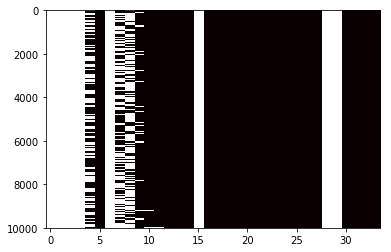

In [110]:
im = plt.imshow(Map, cmap='hot', aspect="auto")
#plt.colorbar(im, orientation='horizontal')
plt.show()

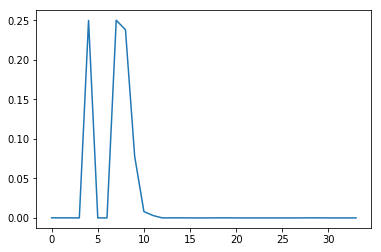

In [113]:
plt.plot(np.var(Map,0))
plt.show()

In [116]:
for m in range(32):
    if (np.var(Map,0)[m] > 0.0003) :
        print str(m)+" - "+str(np.var(Map,0)[m])


4 - 0.249670643375
7 - 0.249902996902
8 - 0.237935390543
9 - 0.0777679456332
10 - 0.00803359320102
11 - 0.00299070182973


# Bits on the AD08200

Clock: close to 0.25

* D0: 26 - GPIO7
* D1: 24 - GPIO8
* D2: 21 - GPIO9
* D3: 19 - GPI10
* D4: 23 - GPI11
* D5: 16 - GPI23
* D6: 18 - GPI24
* D7: 22 - GPI25

In [124]:
ADC2_GPIO = [7, 8,9,10,11,23,24,25]
ADC2len = len( ADC2_GPIO)

In [127]:
def GetV2(Volts):
    Signal = []
    Map = np.zeros((len(Volts),ADC2len), dtype=np.int)
    for i in range(len(Volts)):
        val = Volts[i]
        SignalZero = 0
        for k in range(ADC2len):
            Map[i][k] = (val & 2**k)/2**k
        for k in range(ADC2len):
            SignalZero += 2**k*((val & 2**ADC2_GPIO[k])/2**ADC2_GPIO[k])
        Signal.append(SignalZero)

            
    return Signal,Map

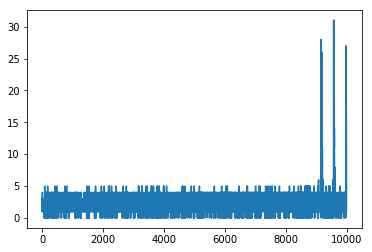

In [128]:
M = GetV2(Bytes)[0]
plt.plot(M)
plt.show()